In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
import keras.backend as kb
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
        'engine-type' , 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
automobile = pd.read_csv('imports-85.data', names=cols)
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
automobile.shape

(205, 26)

In [4]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
for col in automobile:
    print(automobile[col].unique())

[ 3  1  2  0 -1 -2]
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four' '?']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 

In [7]:
automobile.replace('?', np.nan, inplace=True)
automobile.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
automobile['normalized-losses'] = pd.to_numeric(automobile['normalized-losses'], errors='coerce')
automobile['normalized-losses'].fillna(automobile['normalized-losses'].mean(), inplace=True)

In [9]:
automobile['peak-rpm'] = pd.to_numeric(automobile['peak-rpm'], errors='coerce')
automobile['peak-rpm'].fillna(automobile['peak-rpm'].mean(), inplace=True)

In [10]:
automobile['horsepower'] = pd.to_numeric(automobile['horsepower'], errors='coerce')
automobile['horsepower'].fillna(automobile['horsepower'].mean(), inplace=True)

In [11]:
automobile['price'] = pd.to_numeric(automobile['price'], errors='coerce')
automobile['price'].fillna(automobile['price'].mean(), inplace=True)

In [12]:
automobile['bore'] = pd.to_numeric(automobile['bore'], errors='coerce')
automobile['bore'].fillna(automobile['bore'].mean(), inplace=True)

In [13]:
automobile['stroke'] = pd.to_numeric(automobile['stroke'], errors='coerce')
automobile['stroke'].fillna(automobile['stroke'].mean(), inplace=True)

In [14]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [15]:
automobile['num-of-doors'] = automobile['num-of-doors'].map({'two': 2, 'four': 4})

In [16]:
automobile['num-of-doors'] = pd.to_numeric(automobile['num-of-doors'], errors='coerce')
automobile['num-of-doors'].fillna(2.0, inplace=True)

In [17]:
categorical = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location',      
                'engine-type', 'num-of-cylinders', 'fuel-system']

In [18]:
le=LabelEncoder()
for category in categorical:
    automobile[category] = le.fit_transform(automobile[category])

In [19]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2.0,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,2.0,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,2.0,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,4.0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,4.0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [20]:
y=automobile['price']
x=automobile.drop(['price'],axis=1)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [22]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, input_dim=25, kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3328      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
____________________________________________________

In [23]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [ ]:
>>> history = model.fit(x_train, y_train, epochs=2500, batch_size=50,  verbose=1, validation_split=0.2)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


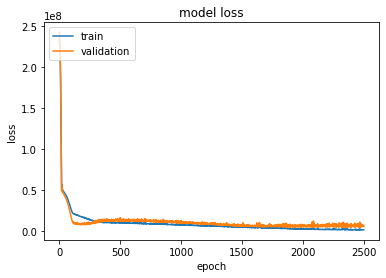

In [28]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
ynew= model.predict(x_test)

In [30]:
error = mean_absolute_error(y_test, ynew)
print('Test MAE: %.3f' % error)

Test MAE: 2753.031
